In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
datadir = "./data/astro/"
videofile = datadir + "mak127-day.m4v"
video = cv2.VideoCapture(videofile)

In [3]:
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [4]:
freqdomain = np.zeros((height, width, 3), dtype=np.complex128)
res, img = video.read()
imgno = 0
while res:
    imgno = imgno + 1
    print("Processing image #", imgno)
    image = img / 255.0
    dfftR = np.fft.fftshift(np.fft.fft2(image[:,:,0]))
    dfftG = np.fft.fftshift(np.fft.fft2(image[:,:,1]))
    dfftB = np.fft.fftshift(np.fft.fft2(image[:,:,2]))
    freqdomain[:, :, 0] = freqdomain[:, :, 0] + dfftR
    freqdomain[:, :, 1] = freqdomain[:, :, 1] + dfftG
    freqdomain[:, :, 2] = freqdomain[:, :, 2] + dfftB
    res, img = video.read()
print("Done.")
freqdomain[:, :, 0] = freqdomain[:, :, 0] / imgno
freqdomain[:, :, 1] = freqdomain[:, :, 1] / imgno
freqdomain[:, :, 2] = freqdomain[:, :, 2] / imgno
idfftR = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain[:, :, 0])))
idfftG = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain[:, :, 1])))
idfftB = np.abs(np.fft.ifft2(np.fft.ifftshift(freqdomain[:, :, 2])))
idfft = np.stack((idfftR, idfftG, idfftB), axis=2)

Processing image # 1
Processing image # 2
Processing image # 3
Processing image # 4
Processing image # 5
Processing image # 6
Processing image # 7
Processing image # 8
Processing image # 9
Processing image # 10
Processing image # 11
Processing image # 12
Processing image # 13
Processing image # 14
Processing image # 15
Processing image # 16
Processing image # 17
Processing image # 18
Processing image # 19
Processing image # 20
Processing image # 21
Processing image # 22
Processing image # 23
Processing image # 24
Processing image # 25
Processing image # 26
Processing image # 27
Processing image # 28
Processing image # 29
Processing image # 30
Processing image # 31
Processing image # 32
Processing image # 33
Processing image # 34
Processing image # 35
Processing image # 36
Processing image # 37
Processing image # 38
Processing image # 39
Processing image # 40
Processing image # 41
Processing image # 42
Processing image # 43
Processing image # 44
Processing image # 45
Processing image # 

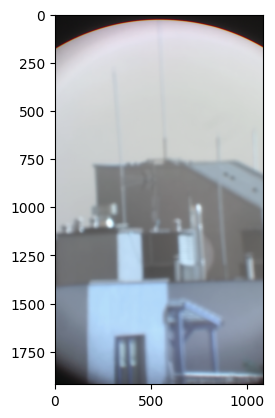

In [5]:
plt.imshow(np.transpose(idfft, (1, 0, 2)))
plt.show()

In [6]:
video.release()